UPDATE: Unstructured not working right away, leaving this for later. 
This notebook will explore everything data related

We will first work with the data we want to use for the rag system, which is in pdf format (ley omnibus)

In [8]:
#from unstructured.partition.auto import partition
#from unstructured.staging.base import elements_to_json
#elements = partition(filename="../data/new_leydemilei/leyOmnibus.pdf")

In [9]:
#elements_to_json(elements, filename="../data/new_leydemilei/test_unstructured.json")

In [10]:
#with open("../data/new_leydemilei/test_unstructured.json", "r") as f:
    #data=f.read()

In [11]:
#data

We will continue with thats inside 'LaLeyDeMilei-raw/decreto.json'

In [14]:
filepath = "./data/LaLeyDeMilei-raw/decreto.json"

In [15]:
import json
with open(filepath) as f:
    data = json.load(f)

In [16]:
data

{'Título I': {'title': 'BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA',
  'contents': {'Articulo 1': 'EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.',
   'Articulo 2': 'DESREGULACIÓN. El Estado Nacional promoverá y asegurará la vigencia efectiva, en todo el territorio nacional, de un sistema económico basado en decisiones libres, adoptadas en un ámbito de libre concurrencia, con respeto a la propiedad privada y a los principios constitucionales de libre circulación de bienes, servicios y trabajo.\n\nPara cumplir ese fin, se dispondrá la más amplia desregulación del comercio, los servicios y la industria en todo el territorio nacional y quedarán sin efecto todas las restricciones a la oferta de bienes y servicios, así como toda exigencia normativa que distorsione los precios de mercado, impida la libre iniciativa privada o evite la interacción espon

We will write a function to test if there's variability in how the important keywords ("Capitulo", "Titulo", "Articulo") are written (e.g., lower/upper case or tildes). 


In [17]:
from typing import Dict, Any

def check_keys(json_obj: Dict[str, Any]) -> Dict[str, bool]:
    """
    Checks if there are keys in a JSON object that contain 'Capítulo', 'Artículo', 'Título', or their lowercase versions.

    Args:
        json_obj: A nested JSON object.

    Returns:
        A dictionary with boolean values indicating the presence of each key.
    """
    # Initialize a dictionary to store the results
    results = {"Título": False, "Artículo": False, "Capítulo": False,
               "título": False, "artículo": False, "capítulo": False}

    # Iterate over each 'Título' in the JSON object
    for titulo, titulo_content in json_obj.items():
        # Check if the 'Título' key contains any of the specified strings
        for key in results.keys():
            if key in titulo:
                results[key] = True

        # Iterate over the 'contents' of this 'Título'
        for key, content in titulo_content['contents'].items():
            # Check if the key contains any of the specified strings
            for result_key in results.keys():
                if result_key in key:
                    results[result_key] = True

            # If the key starts with 'Capítulo', iterate over the 'contents' of this 'Capítulo'
            if key.startswith("Capítulo") or key.startswith("capítulo"):
                for sub_key in content['contents'].keys():
                    # Check if the sub_key contains any of the specified strings
                    for result_key in results.keys():
                        if result_key in sub_key:
                            results[result_key] = True

    # Print comprehensive statements about the results
    for key, value in results.items():
        if value:
            print(f"The key '{key}' was found in the JSON object. You need to handle this case")
        else:
            print(f"The key '{key}' was NOT found in the JSON object.")



In [18]:
check_keys(data)

The key 'Título' was found in the JSON object. You need to handle this case
The key 'Artículo' was NOT found in the JSON object.
The key 'Capítulo' was NOT found in the JSON object.
The key 'título' was NOT found in the JSON object.
The key 'artículo' was NOT found in the JSON object.
The key 'capítulo' was NOT found in the JSON object.


We can see that there are cases where a key with tilde appears. We will write a function to parse the json and remove the tildes. 

In [19]:
import re

def strip_tildes(old: str) -> str:
    """
    Removes common tildes from characters.
    """

    new = old#.lower()
    new = re.sub(r'[àáâãäå]', 'a', new)
    new = re.sub(r'[èéêë]', 'e', new)
    new = re.sub(r'[ìíîï]', 'i', new)
    new = re.sub(r'[òóôõö]', 'o', new)
    new = re.sub(r'[ùúûü]', 'u', new)
    return new

from typing import Dict, Any


def replace_tilde_keys(json_obj: Dict[str, Any]) -> Dict[str, Any]:
    """
    Replaces keys in a JSON object that contain 'Artículo', 'Capítulo', or 'Título' with their non-tilde versions.

    Args:
        json_obj: A nested JSON object.

    Returns:
        A new JSON object with the replaced keys.
    """
    # Initialize an empty dictionary to store the new JSON object
    new_json_obj = {}

    # Iterate over each key-value pair in the JSON object
    for key, value in json_obj.items():
        # If the value is a dictionary, recursively call this function
        if isinstance(value, dict):
            value = replace_tilde_keys(value)

        # Replace the key with its non-tilde version
        new_key = strip_tildes(key)

        # If the new key is different from the old key, print a message
        if new_key != key:
            print(f"Replaced key '{key}' with '{new_key}'.")

        # Add the new key-value pair to the new JSON object
        new_json_obj[new_key] = value

    # Return the new JSON object
    return new_json_obj

In [20]:
data = replace_tilde_keys(data)

Replaced key 'Título I' with 'Titulo I'.
Replaced key 'Título II' with 'Titulo II'.
Replaced key 'Título III' with 'Titulo III'.
Replaced key 'Título IV' with 'Titulo IV'.
Replaced key 'Título V' with 'Titulo V'.
Replaced key 'Título VI' with 'Titulo VI'.
Replaced key 'Título VII' with 'Titulo VII'.
Replaced key 'Título VIII' with 'Titulo VIII'.
Replaced key 'Título IX' with 'Titulo IX'.
Replaced key 'Título X' with 'Titulo X'.
Replaced key 'Título XI' with 'Titulo XI'.
Replaced key 'Título XII' with 'Titulo XII'.
Replaced key 'Título XIII' with 'Titulo XIII'.
Replaced key 'Título XIV' with 'Titulo XIV'.
Replaced key 'Título XV' with 'Titulo XV'.
Replaced key 'Título XVI' with 'Titulo XVI'.


In [21]:
check_keys(data)

The key 'Título' was NOT found in the JSON object.
The key 'Artículo' was NOT found in the JSON object.
The key 'Capítulo' was NOT found in the JSON object.
The key 'título' was NOT found in the JSON object.
The key 'artículo' was NOT found in the JSON object.
The key 'capítulo' was NOT found in the JSON object.


Ok, now we will count the number of "Titulo *"s, "Capitulo *"s, and "Articulo *"s. We will then use this information to determine the `top_k` parameter of our RAG system (e.g., if a Titulo of a given topic has 10 Articulos, `top_k` should take that into account to determine how many Articulos to retrieve)

In [22]:
from typing import Dict, Any, Tuple

def count_elements(json_obj: Dict[str, Any]) -> Dict[str, Dict[str, int]]:
    """
    Counts the number of 'Título', 'Articulo', and 'Capitulo' in a JSON object.

    Args:
        json_obj: A nested JSON object.

    Returns:
        A dictionary with the counts of 'Título', 'Articulo', and 'Capitulo'.
    """
    # Initialize an empty dictionary to store the counts
    counts = {}

    # Iterate over each 'Título' in the JSON object
    for titulo, titulo_content in json_obj.items():
        # Initialize the count of 'Articulo' and 'Capitulo' for this 'Título' to 0
        counts[titulo] = {"Articulo": 0, "Capitulo": 0}

        # Iterate over the 'contents' of this 'Título'
        for key, content in titulo_content['contents'].items():
            # If the key starts with 'Articulo', increment the count of 'Articulo' for this 'Título'
            if key.startswith("Articulo"):
                counts[titulo]["Articulo"] += 1
            # If the key starts with 'Capitulo', increment the count of 'Capitulo' for this 'Título'
            elif key.startswith("Capitulo"):
                counts[titulo]["Capitulo"] += 1
                # Iterate over the 'contents' of this 'Capitulo'
                for sub_key in content['contents'].keys():
                    # If the key starts with 'Articulo', increment the count of 'Articulo' for this 'Título'
                    if sub_key.startswith("Articulo"):
                        counts[titulo]["Articulo"] += 1

    # Return the counts
    return counts

In [23]:
from typing import Dict, Any

def count_elements(json_obj: Dict[str, Any]) -> Dict[str, Dict[str, Any]]:
    """
    Counts the number of 'Título', 'Articulo', and 'Capitulo' in a JSON object.

    Args:
        json_obj: A nested JSON object.

    Returns:
        A dictionary with the counts of 'Título', 'Articulo', and 'Capitulo'.
    """
    # Initialize an empty dictionary to store the counts
    counts = {}

    # Iterate over each 'Título' in the JSON object
    for titulo, titulo_content in json_obj.items():
        # Initialize the count of 'Articulos' and 'Capitulos' for this 'Título' to 0
        counts[titulo] = {"title": titulo_content['title'], "Total Articulos": 0, "Articulos sin Capitulo": 0, "Capitulos": {}}

        # Iterate over the 'contents' of this 'Título'
        for key, content in titulo_content['contents'].items():
            # If the key starts with 'Articulo', increment the count of 'Articulos sin Capitulo' for this 'Título'
            if key.startswith("Articulo"):
                counts[titulo]["Articulos sin Capitulo"] += 1
                counts[titulo]["Total Articulos"] += 1
            # If the key starts with 'Capitulo', increment the count of 'Capitulos' for this 'Título'
            elif key.startswith("Capitulo"):
                counts[titulo]["Capitulos"][key] = {"title": content['title'], "Articulos": 0}
                # Iterate over the 'contents' of this 'Capitulo'
                for sub_key in content['contents'].keys():
                    # If the sub_key starts with 'Articulo', increment the count of 'Articulos' for this 'Capitulo'
                    if sub_key.startswith("Articulo"):
                        counts[titulo]["Capitulos"][key]["Articulos"] += 1
                        counts[titulo]["Total Articulos"] += 1

    # Return the counts
    return counts


In [24]:
count_elements(data)

{'Titulo I': {'title': 'BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA',
  'Total Articulos': 3,
  'Articulos sin Capitulo': 3,
  'Capitulos': {}},
 'Titulo II': {'title': 'DESREGULACIÓN ECONÓMICA',
  'Total Articulos': 32,
  'Articulos sin Capitulo': 9,
  'Capitulos': {'Capitulo I': {'title': 'Banco de la Nación Argentina (Ley N° 21.799)',
    'Articulos': 1},
   'Capitulo II': {'title': 'Tarjetas de crédito (Ley N° 25.065)',
    'Articulos': 10},
   'Capitulo III': {'title': 'Operaciones de crédito mobiliario realizadas por medio de certificados de depósito y warrant. (Ley N° 9.643)',
    'Articulos': 12}}},
 'Titulo III': {'title': 'REFORMA DEL ESTADO',
  'Total Articulos': 17,
  'Articulos sin Capitulo': 5,
  'Capitulos': {'Capitulo I': {'title': 'Reforma del Estado (Ley N° 23.696)',
    'Articulos': 7},
   'Capitulo II': {'title': 'Transformación de empresas del Estado en Sociedades Anónimas',
    'Articulos': 5}}},
 'Titulo IV': {'title': 'TRABAJO',
  'Total Articulos': 45

Let's build a function that summarizes these results in a more natural language fashion. 

In [25]:
def generate_summary(counts: Dict[str, Dict[str, Any]]) -> str:
    """
    Generates a natural language summary of the counts of 'Título', 'Articulo', and 'Capitulo'.

    Args:
        counts: A dictionary with the counts of 'Título', 'Articulo', and 'Capitulo'.

    Returns:
        A string with the natural language summary.
    """
    # Initialize an empty string to store the summary
    summary = ""

    # Iterate over each 'Título' in the counts
    for titulo, titulo_content in counts.items():
        # Add the 'Título' and its title to the summary
        summary += f'"{titulo}" titled "{titulo_content["title"]}" '

        # Add the total number of 'Articulos' to the summary
        summary += f'has in total {titulo_content["Total Articulos"]} Articulos, '

        # Add the number of 'Articulos sin Capitulo' to the summary
        summary += f'of which {titulo_content["Articulos sin Capitulo"]} Articulos are not grouped into a Capitulo, '

        # If there are 'Capitulos'
        if titulo_content["Capitulos"]:
            # Add the number of 'Capitulo' to the summary
            summary += f'and the other {titulo_content["Total Articulos"] - titulo_content["Articulos sin Capitulo"]} Articulos are divided between {len(titulo_content["Capitulos"])} Capitulos. '

            # Iterate over each 'Capitulo' in the 'Título'
            for capitulo, capitulo_content in titulo_content["Capitulos"].items():
                # Add the 'Capitulo', its title, and the number of 'Articulo' to the summary
                summary += f'The "{capitulo}" titled "{capitulo_content["title"]}" has {capitulo_content["Articulos"]} Articulos. '
        else:
            # If there are no 'Capitulo', add this information to the summary
            summary += 'There are no Capitulos. '

        # Add a line break to the summary
        summary += '\n'

    # Return the summary
    return print(summary)

In [26]:
generate_summary(count_elements(data))

"Titulo I" titled "BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA" has in total 3 Articulos, of which 3 Articulos are not grouped into a Capitulo, There are no Capitulos. 
"Titulo II" titled "DESREGULACIÓN ECONÓMICA" has in total 32 Articulos, of which 9 Articulos are not grouped into a Capitulo, and the other 23 Articulos are divided between 3 Capitulos. The "Capitulo I" titled "Banco de la Nación Argentina (Ley N° 21.799)" has 1 Articulos. The "Capitulo II" titled "Tarjetas de crédito (Ley N° 25.065)" has 10 Articulos. The "Capitulo III" titled "Operaciones de crédito mobiliario realizadas por medio de certificados de depósito y warrant. (Ley N° 9.643)" has 12 Articulos. 
"Titulo III" titled "REFORMA DEL ESTADO" has in total 17 Articulos, of which 5 Articulos are not grouped into a Capitulo, and the other 12 Articulos are divided between 2 Capitulos. The "Capitulo I" titled "Reforma del Estado (Ley N° 23.696)" has 7 Articulos. The "Capitulo II" titled "Transformación de empres

And now let's generate some statistics for these results

In [27]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import numpy as np

def print_and_plot_statistics(counts: Dict[str, Dict[str, Any]]) -> None:
    """
    Prints statistics and generates a bar plot for the counts of 'Título', 'Articulo', and 'Capitulo'.

    Args:
        counts: A dictionary with the counts of 'Título', 'Articulo', and 'Capitulo'.
    """
    # Initialize lists to store the 'Título' names and the counts of 'Articulo'
    titulo_names = []
    total_articulo_counts = []

    # Iterate over each 'Título' in the counts
    for titulo, titulo_content in counts.items():
        # Add the 'Título' name to the list
        titulo_names.append(titulo)

        # Add the total count of 'Articulo' to the list
        total_articulo_counts.append(titulo_content["Total Articulos"])

        # Print the 'Título' name and the total count of 'Articulo'
        print(f'{titulo} has {titulo_content["Total Articulos"]} Articulos in total')

        # If there are 'Capitulo'
        if titulo_content["Capitulos"]:
            # Print the number of 'Capitulo'
            print(f'  and is divided into {len(titulo_content["Capitulos"])} Capitulos:')

            # Iterate over each 'Capitulo' in the 'Título'
            for capitulo, capitulo_content in titulo_content["Capitulos"].items():
                # Print the 'Capitulo' name and the count of 'Articulo'
                print(f'    {capitulo} has {capitulo_content["Articulos"]} Articulos')

    # Generate a bar plot for the total counts of 'Articulo'
    bars = plt.bar(titulo_names, total_articulo_counts)
    plt.xlabel('Título')
    plt.ylabel('Total Number of Articulos')
    plt.title('Total Number of Articulos per Título')
    plt.xticks(rotation=90)

    # Add the total number of 'Articulo' on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

    # Calculate and plot the median of the total number of 'Articulo'
    median = np.median(total_articulo_counts)
    plt.axhline(y=median, color='r', linestyle='--')
    plt.text(len(titulo_names), median-0.8, 'Median', ha='right', va='center', color='r')

    plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [28]:
print_and_plot_statistics(count_elements(data))

NameError: name 'print_and_plot_statistics' is not defined

We will flatten the json to make the chunks more informative

In [29]:
from typing import Dict, Any

def flatten_json(json_obj: Dict[str, Any]) -> Dict[str, str]:
    """
    Flattens a nested JSON object according to specific rules.

    The keys of the flattened JSON object are constructed by concatenating the "Título", the "title" of the "Título",

    The value of each key-value pair is modified to prepend the key information.

    Args:
        json_obj: A nested JSON object.

    Returns:
        A flattened JSON object.
    """
    flat_json = {}

    for titulo, titulo_content in json_obj.items():
        titulo_name = f"{titulo}: {titulo_content['title']}"
        for articulo, articulo_content in titulo_content['contents'].items():
            if isinstance(articulo_content, dict) and 'title' in articulo_content:
                # This is a "Capitulo"
                capitulo_name = f"{titulo_name}. {articulo}: {articulo_content['title']}"
                for sub_articulo, sub_articulo_content in articulo_content['contents'].items():
                    key = f"{capitulo_name}. {sub_articulo}"
                    value = f"{key}: {sub_articulo_content}"
                    flat_json[key] = value
            else:
                # This is an "Articulo"
                key = f"{titulo_name}. {articulo}"
                value = f"{key}: {articulo_content}"
                flat_json[key] = value

    return flat_json

In [30]:
new_json = flatten_json(data)

In [ ]:
new_json

{'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1': 'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1: EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.',
 'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2': 'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2: DESREGULACIÓN. El Estado Nacional promoverá y asegurará la vigencia efectiva, en todo el territorio nacional, de un sistema económico basado en decisiones libres, adoptadas en un ámbito de libre concurrencia, con respeto a la propiedad privada y a los principios constitucionales de libre circulación de bienes, servicios y trabajo.\n\nPara cumplir ese fin, se dispondrá la más amplia desregulación del comercio, los servicios y la industria en todo el territorio nacional y quedarán sin efecto todas la

Now we will prepend the following str to every key and value, in order to increase the amount of information in every chunk. (although prepending to the key doesn't add info to the llm during rag)

str: "Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. " 

In [31]:
def prepend_to_keys(data_dict, prepend_str):
    # Get the first key in the dictionary
    first_key = next(iter(data_dict))

    # Check if the prepend_str is already at the start of the first key
    if not first_key.startswith(prepend_str):
        data_dict = {f"{prepend_str}{key}": value for key, value in data_dict.items()}

    return data_dict

prepend_str = "Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. " 
new_json = prepend_to_keys(new_json, prepend_str)


def prepend_to_values(data_dict: dict, prepend_str: str) -> dict:
    """
    Prepends a string to the values of a dictionary.

    Args:
        data_dict: The original dictionary.
        prepend_str: The string to prepend.

    Returns:
        The modified dictionary.
    """
    # Iterate over the dictionary items
    for key, value in data_dict.items():
        # Check if the prepend_str is already at the start of the value
        if not str(value).startswith(prepend_str):
            # Prepend the string to the value
            data_dict[key] = f"{prepend_str}{value}"

    return data_dict

# Use the function
new_json = prepend_to_values(new_json, prepend_str)

new_json

{'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1': 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1: EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.',
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2': 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2: DESREGULACIÓN. El Estado Nacional promoverá y asegurará la vigencia efectiva, en todo el territorio nacional, de un sistema económico basado en decisiones libres, adoptadas en un ámbito de libre concurrencia

Now we will save this new flattened json to be chunked in 01_vectors.ipynb

In [33]:
with open("./data/LaLeyDeMilei-raw/decreto_flat.json", "w", encoding='utf-8') as f:
    json.dump(new_json, f, ensure_ascii=False, indent=4)


and we will make a version where the key is not prepended to the value for llm-response purposes

In [39]:
new_json_unpreppended = {key: value.replace(f"{key}: ", '', 1) for key, value in new_json.items()}
new_json_unpreppended


with open("./data/LaLeyDeMilei-raw/decreto_flat_unpreppended.json", "w", encoding='utf-8') as f:
    json.dump(new_json_unpreppended, f, ensure_ascii=False, indent=4)

We will now check number of tokens in each value

In [ ]:
from typing import Dict

def count_tokens(original_dict: Dict[str, str]) -> Dict[str, int]:
    """
    Counts the number of words in each value of a dictionary.

    Args:
        original_dict: A dictionary where each value is a string.

    Returns:
        A new dictionary where each key is the same as in the original dictionary,
        and each value is the number of words in the corresponding value in the original dictionary.
    """
    return {key: len(value.split()) * 0.75 for key, value in original_dict.items()}

In [ ]:
token_counts = count_tokens(new_json)
token_counts


{'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1': 26.25,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2': 110.25,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 3': 120.0,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo II: DESREGULACIÓN ECONÓMICA. Articulo 4': 8.25,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo II: DESREGULACIÓN ECONÓMICA. Articulo 5': 8.25,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo II: DESREGULACIÓN ECONÓMICA. Articulo 6': 8.25,
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo II: DESREGULACIÓN ECONÓMICA. Articulo 7'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict
import statistics

def plot_token_counts(token_counts: Dict[str, int]) -> None:
    """
    Creates a distribution plot of token counts.

    Args:
        token_counts: A dictionary where each key is a string and each value is a token count.

    Returns:
        None. The function displays a plot.
    """
    # Get the list of word counts
    counts = list(token_counts.values())

    # compute the median
    median = statistics.median(counts)

    # Create the plot
    sns.histplot(counts, kde=True)

    # Add vertical line at the median
    median_line = plt.axvline(median, color='r', linestyle='--')

    # Set the title and labels
    plt.title('Distribution of Token Counts')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')

    # Add a legend
    plt.legend([median_line], [f'Median: {median}'])

    # Show the plot
    plt.show()

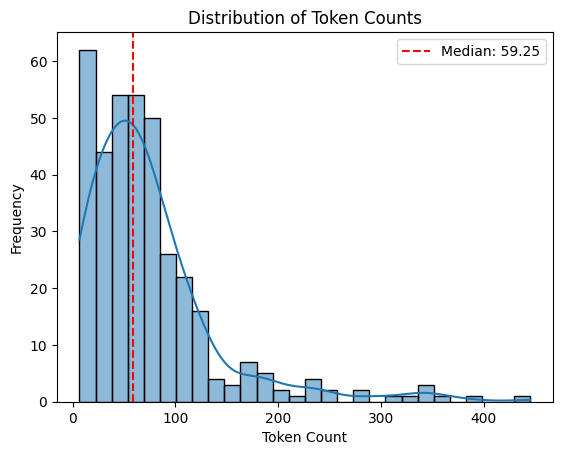

In [ ]:
plot_token_counts(token_counts)

let's run some checks on the data.
    1. Check for keys without values ('None'). 
    2. Check for empty strings as values. 
    3. Check for keys with specific format: ToDo. 
    4. Check for specific data types as values (str).

In [ ]:
import re

def check_none_values(data_dict):
    none_keys = [k for k, v in data_dict.items() if v is None]
    if none_keys:
        print(f"Keys with None values: {none_keys}")
    else:
        print("No keys with None values found.")

def check_empty_string_values(data_dict):
    empty_keys = [k for k, v in data_dict.items() if v == ""]
    if empty_keys:
        print(f"Keys with empty string values: {empty_keys}")
    else:
        print("No keys with empty string values found.")

def check_key_format(data_dict):
    None

def check_value_types(data_dict):
    incorrect_values = [k for k, v in data_dict.items() if not isinstance(v, str)]
    if incorrect_values:
        print(f"Keys with non-string values: {incorrect_values}")
    else:
        print("All values are strings.")

def testing_pipeline(data_dict):
    check_none_values(data_dict)
    check_empty_string_values(data_dict)
    check_key_format(data_dict)
    check_value_types(data_dict)

testing_pipeline(new_json)

No keys with None values found.
No keys with empty string values found.
All values are strings.


Now we will also flatten the chunks made by hand in '../data/LaLeyDeMilei/decreto_chunks.json'


In [ ]:
new_json

{'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1': 'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 1: EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.',
 'Decreto de Necesidad y Urgencia N° DNU-2023-70-APN-PTE. Fecha 20-12-2023. Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2': 'Titulo I: BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA. Articulo 2: DESREGULACIÓN. El Estado Nacional promoverá y asegurará la vigencia efectiva, en todo el territorio nacional, de un sistema económico basado en decisiones libres, adoptadas en un ámbito de libre concurrencia, con respeto a la propiedad privada y a los principios constitucionales de libre circulación de bienes, servicios y trabajo.\n\nPara cumplir ese fi

In [ ]:
filepath = "../data/LaLeyDeMilei/decreto_chunks.json"

In [ ]:
custom_data = json.load(open(filepath))

In [ ]:
custom_data

[{'text': 'EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.\n',
  'metadata': {'documento': 'Decreto',
   'fecha': '20-12-2023',
   'titulo': 'Título I - BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA',
   'articulo': 'Articulo 1',
   'laws': [],
   'start_idx': 0,
   'end_idx': 179}},
 {'text': 'DESREGULACIÓN. El Estado Nacional promoverá y asegurará la vigencia efectiva, en todo el territorio nacional, de un sistema económico basado en decisiones libres, adoptadas en un ámbito de libre concurrencia, con respeto a la propiedad privada y a los principios constitucionales de libre circulación de bienes, servicios y trabajo.\n\nPara cumplir ese fin, se dispondrá la más amplia desregulación del comercio, los servicios y la industria en todo el territorio nacional y quedarán sin efecto todas las restricciones a la oferta de bienes y servicios, así como to

In [ ]:
from typing import List

def flatten_custom_json(json_list: List[Dict[str, Any]]) -> Dict[str, str]:
    """
    Flattens a list of JSON objects according to specific rules.

    The keys of the flattened JSON object are constructed by concatenating the "documento", "fecha", "titulo", and "articulo" from the metadata.

    The value of each key-value pair is the "text" from the original JSON object.

    Args:
        json_list: A list of JSON objects.

    Returns:
        A flattened JSON object.
    """
    flat_json = {}

    for json_obj in json_list:
        key = f"documento: {json_obj['metadata']['documento']}, fecha: {json_obj['metadata']['fecha']}, titulo: {json_obj['metadata']['titulo']}, articulo: {json_obj['metadata']['articulo']}"
        value = json_obj['text']
        flat_json[key] = value

    return flat_json

In [ ]:
custom_data_flatten = flatten_custom_json(custom_data)
custom_data_flatten

{'documento: Decreto, fecha: 20-12-2023, titulo: Título I - BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA, articulo: Articulo 1': 'EMERGENCIA. Declárase la emergencia pública en materia económica, financiera, fiscal, administrativa, previsional, tarifaria, sanitaria y social hasta el 31 de diciembre de 2025.\n',
 'documento: Decreto, fecha: 20-12-2023, titulo: Título I - BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA, articulo: Articulo 2': '\nLa reglamentación determinará los plazos e instrumentos a través de los cuales se hará efectiva la desregulación dispuesta en el párrafo anterior.\n',
 'documento: Decreto, fecha: 20-12-2023, titulo: Título I - BASES PARA LA RECONSTRUCCIÓN DE LA ECONOMÍA ARGENTINA, articulo: Articulo 3': '\nSe invita a las autoridades de las provincias y de la Ciudad Autónoma de Buenos Aires a dictar, en el ámbito de sus respectivas competencias, las normas necesarias o convenientes para el cumplimiento de esos fines.\n',
 'documento: Decreto, fech

In [ ]:
# save json
with open("../data/LaLeyDeMilei/decreto_chunks_flat.json", "w", encoding='utf-8') as f:
    json.dump(custom_data_flatten, f, ensure_ascii=False, indent=4)